![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [78]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [27]:
# Carrega a base

filename_features = "./UCI HAR Dataset/features.txt"
filename_labels = "./UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "./UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "./UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "./UCI HAR Dataset/train/y_train.txt"

filename_subtest = "./UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "./UCI HAR Dataset/test/X_test.txt"
filename_ytest = "./UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

/tmp/ipykernel_79829/3545406115.py:14: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
/tmp/ipykernel_79829/3545406115.py:17: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
/tmp/ipykernel_79829/3545406115.py:21: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)


## Árvore sem e com PCA

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [68]:
def pca_calculation(n_components: int, X_train=X_train, 
                    X_test = X_test, y_train=y_train, 
                    y_test=y_test, ccp_alpha = 0.001) -> None:



    # Calcula o tempo que o código levou para rodar
    start_time = time.time()

    # Cria modelo PCA
    pca = PCA(n_components=n_components, random_state=42)
    pca.fit(X_train)

    # Separa os dados
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                        test_size=0.25, random_state=42) 

    # transforma os dados
    pca_X_train = pca.transform(X_train)
    pca_X_valid = pca.transform(X_valid)
    pca_X_test = pca.transform(X_test)

    # Define a arvore
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(pca_X_train, y_train)

    # Calcula a acurácia
    y_pred_valid = clf.predict(pca_X_valid)
    accuracia_valid = accuracy_score(y_valid, y_pred_valid)

    y_pred_test = clf.predict(pca_X_test)
    accuracia_test = accuracy_score(y_test, y_pred_test)

    # Tempo final do código (sem print)
    end_time = time.time()
    # Tempo total de execução
    tempo_total = end_time - start_time

    # Mostra o resultado
    print(f'\nAcurácia de Validação:{accuracia_valid :.3f}')
    print(f'Acurária de Teste: {accuracia_test :.3f}')

    # Porcentagem de explicação das componentes
    explica = pca.explained_variance_ratio_.cumsum()
    print(f'{n_components} explicam {explica[-1] :.3f} dos dados.\n')

    # Mostra o tempo passado em segundos
    print(f'Tempo: {tempo_total :.2f}s')

    
    return None


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


In [69]:
# Roda o modelo PCA para os componentes pedidos
# None significa rodar todas as componentes
[pca_calculation(n) for n in [1, 2, 5, 10, 50, None]]


Acurácia de Validação:0.51
Acurária de Teste: 0.46
1 explicam 0.63 dos dados.

Tempo: 1.33s

Acurácia de Validação:0.59
Acurária de Teste: 0.57
2 explicam 0.67 dos dados.

Tempo: 2.08s

Acurácia de Validação:0.82
Acurária de Teste: 0.77
5 explicam 0.75 dos dados.

Tempo: 1.61s

Acurácia de Validação:0.87
Acurária de Teste: 0.80
10 explicam 0.81 dos dados.

Tempo: 1.60s

Acurácia de Validação:0.87
Acurária de Teste: 0.81
50 explicam 0.93 dos dados.

Tempo: 4.20s

Acurácia de Validação:0.87
Acurária de Teste: 0.81
None explicam 1.00 dos dados.

Tempo: 10.81s


[None, None, None, None, None, None]

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

In [77]:
num_max_comp = X_train.shape[1]
tempo = np.array([1.33, 2.08, 1.61, 1.60, 4.20, 10.81])
acuracia_test = np.array([0.46, 0.57, 0.77, 0.80, 0.81, 0.81])
componentes = np.array([1, 2, 5, 10, 50, num_max_comp])

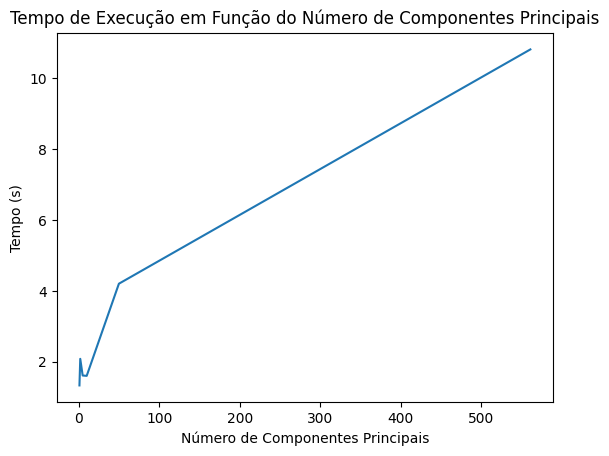

In [79]:
# tempo vs componentes
plt.plot(componentes, tempo)
plt.title('Tempo de Execução em Função do Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Tempo (s)')
plt.show()

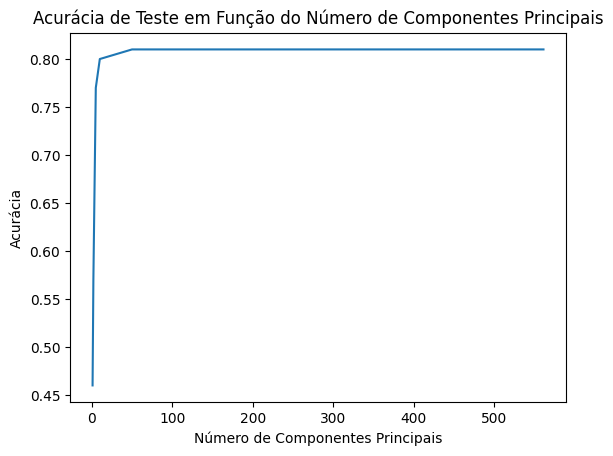

In [80]:
# acuracia vs componentes

plt.plot(componentes, acuracia_test)
plt.title('Acurácia de Teste em Função do Número de Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Acurácia')
plt.show()

### Anexo

Teste PCA com KFold.

In [5]:
%%time

# Aprimorando com uma cross-validation KFold

clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
# cross-validation com o pacote do scikit-learn
scores_test = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Scores Test: {scores_test}')
print(f'Score médio: {scores_test.mean():.2f} +/- {scores_test.std():.2f}')

Scores Test: [0.81985044 0.83208702 0.84557823 0.89047619 0.88979592]
Score médio: 0.86 +/- 0.03
CPU times: user 38.7 s, sys: 330 ms, total: 39 s
Wall time: 50.2 s


Como comparação, usando o KFold, a árvore provalvelmente não está tão sobreajustado como na célula anterior. Atingindo a mesma acurácia que na base de testes. 

Esse foi apenas um exemplo para comparação.